[*********************100%***********************]  1 of 1 completed
C:\Users\Pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0070 - val_loss: 0.0014
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 4.9014e-04 - val_loss: 0.0013
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.9148e-04 - val_loss: 0.0020
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 5.7667e-04 - val_loss: 0.0019
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 3.5010e-04 - val_loss: 0.0010
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 3.1634e-04 - val_loss: 8.2148e-04
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.0434e-04 - val_loss: 8.1020e-04
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 2.8378e-04 - val_loss: 4.7182e-04
Epoch 9/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 2.8042e-04 - val_loss: 5.2813e-04
Epoch 10/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 3.0998e-04 - val_loss: 7.0373e-04
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step 


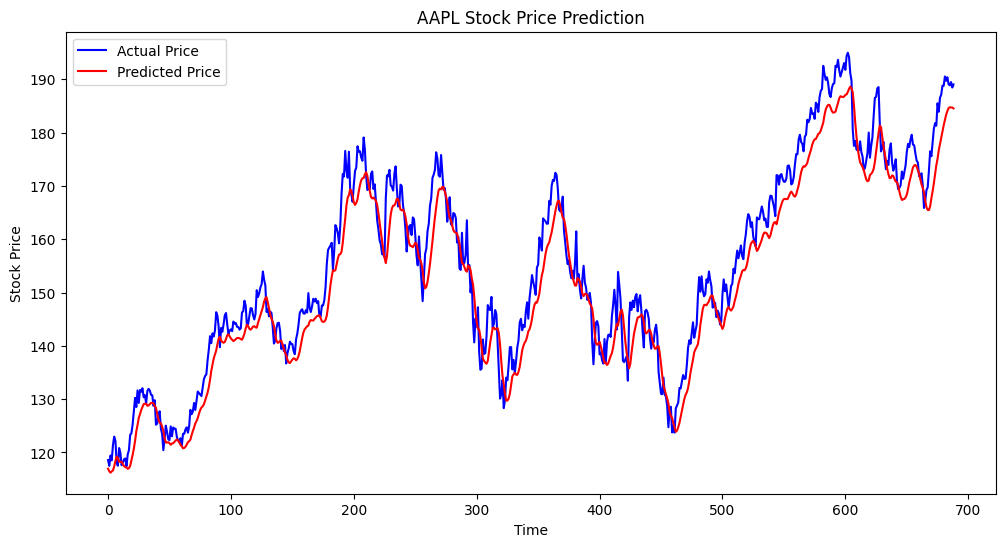

Mean Squared Error: 25.18724663368724


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-12-01'

data = yf.download(ticker, start=start_date, end=end_date)

data = data[['Close']]

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i, 0])
    y.append(data_scaled[i, 0])

X = np.array(X)
y = np.array(y)

X = X.reshape(X.shape[0], X.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential()

model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_actual, predictions)
print(f'Mean Squared Error: {mse}')